
<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Imagen cortesía de: https://www.kaggle.com/
</p>

# Redes Neuronales con TF 2.0
En esta unidad vamos a crear una red neuronal y `clasificar` un dataset de imagenes.

Esta va a ser una red de datos `no combusional` porque justamente en esta ocasion si sabemos como va a ser el conjunto de entrada (28x28), primera capa.



In [ ]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tf.__version__

'2.2.0-rc3'

## Carga de dataset

* Los valos de X van a ser los valores de los pixeles
* Los valores de Y va a ser la clasificacion

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
print('Dimension del dataset: ',x_train.shape)
print('Dimension de cada elemento:',x_train[0].shape)

4423680/4422102 [==============================] - 0s 0us/step
Dimension del dataset:  (60000, 28, 28)
Dimension de cada elemento: (28, 28)


## Analisis Exploratorio


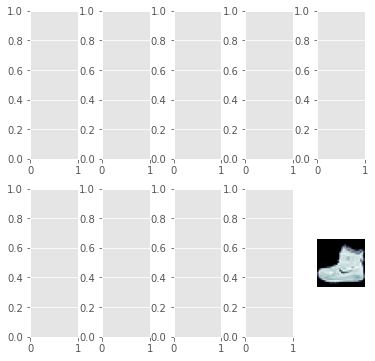

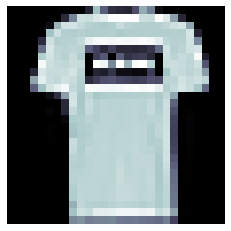

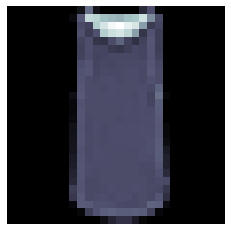

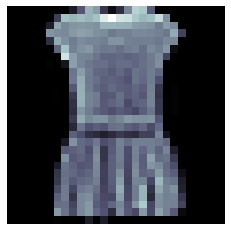

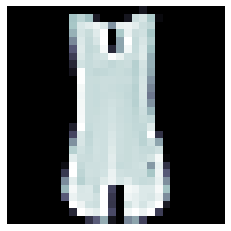

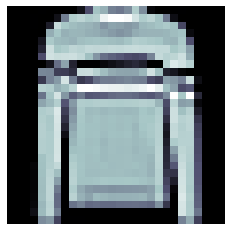

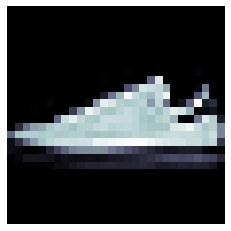

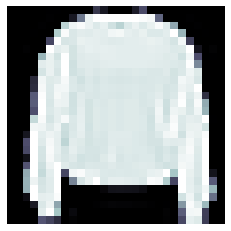

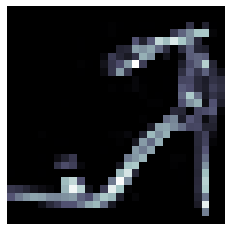

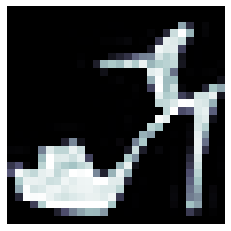

In [ ]:
fig , ax = plt.subplots(2,5 , figsize=(6,6))

for i , ax_i in enumerate(ax.flat):
  plt.axis('off')
  ax_i = plt.imshow(x_train[i] , cmap='bone')
  plt.subplots_adjust(wspace=0.5)
  plt.show()

## Preprocesado


### Normalizar dataset
* La forma de entrenar mas rapidamente nuestro dataset es a traves de que este normalizado entre valores de 0 y 1
* Para normalizarlo debemos saber el valor maximo que puede alacanzar nuestro dataset

In [ ]:
print('Maximo valor',x_train.max())

Maximo valor 255


In [ ]:
x_train = x_train/255
x_test = x_test/255

### Redimensionar el dataset
* La tecnica se denomina `flattening` osea aplanamiento.
* Como vamos a utilizar una red neuronal totalmente conectada, vamos a redimensionar los subconjuntos de entrenamiento y testing a formato de vector en lugar de en formato de matriz.
* Cada imagen esta conformado por 28 columnas con cada una 28 filas, y los pasaremos a un erreglo de 784.

In [ ]:
# np.reshape nos va a permitir redimensionar elementos
# primero son las filas y luego todas las columnas
# el -1 denota no aplicar ningun cambio
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [ ]:
x_train.shape

(60000, 784)

## Construir la Red Neuronal Artificial

### Creacion de modelo
Vamos a definir un objeto de modelo Secuencial

In [ ]:
# asi se definie un modelo secuencial, esto quiere decir una capa y luego otra
model = tf.keras.Sequential()

### Añadir la primera capa (Densa)
Hyper-parametros de la capa:
* Numero de unidades/neuronas = 128
  * Cantidad de capas ocultas que crean, osea la siguiente linea.
* Funcion de activacion: Rectificante (relu).
* input_shape: (784,0)

In [ ]:
# la forma de crear una capa es atraves de:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

### Añadir capa Dropout
Dropout es una técnica de `Regularization` donde aleatoriamente se asignan a ciertas neuronas de la red el valor cero. De este modo, mientras se entrena, estas neuronas no actualizarán sus valores. Al tener cierto porcentaje de neuronas sin actualizar, el proceso de entrenamiento toma más tiempo pero por contra tenemos menos posibilidades de sufrir overfitting.
* Normlamente estos valores varian entre el 0.2 y 0.5
* En palabras resumidas es 'dormir' neuronas para evitar el overfitting.

In [ ]:
model.add(tf.keras.layers.Dropout(0.2)) # 1 de cada 5 no se actualizara

### Añadiendo Refuerzo de capas ( No correr )
* agregar mas capas no implica que el modelo mejore

In [ ]:
#model.add(tf.keras.layers.Dense(units=128 , activation='relu' , input_shape=(128,)))
#model.add(tf.keras.layers.Dropout(0.2))

### Añadiendo capa final
* units numero de clases de salida : 10
* funcion de activacion: `softmax` 
  * Devuelce la probabilidad de cual puede ser

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model

## Compilar el modelo
* Eleccion de un metodo para optimizacion: Adam
* Loss: Sparce Softmax (categorizar)
  * Funcion de perdida, analizar a traves de propagacion hacia atras para mejorarlo


In [ ]:
#adam es el mejor gradiente eslocastico
#funcion de perdidad: basciamente como va a calcular el error
#metrica de la presicion - correcto sobre total
# elejimo esta porque no es binario, son muchos
# en caso de binarias eligiriamos binari_crossentropy...
opt = tf.keras.optimizers.Adam(learning_rate=0.0001 , beta_1=0.7 , beta_2= 0.7 , epsilon=1e-07)

model.compile(optimizer=opt , loss='sparse_categorical_crossentropy' , metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()
# Model: type
# esta formado por 3 capas (Densa, Dropout, Densa de salida)
# cuantos parametros tiene que calcular @Param (Capa anterior * Capa siguiente) + capa anterior (termino independiente)
# Total_params : cantidad de parametros totales
# calculables
# no calculables, son todos calculables en este caso (Son mas haya del entrenamiento)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Entrenar el Modelo

In [ ]:
model.fit(x_train , y_train , epochs=30 )
# epocas es la cantidad de veces que se va a iterar para calcular el peso
# Viendo los datos nos damos cuenta que no vale la pena seguir mejorando los epocs

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3258 - sparse_categorical_accuracy: 0.8946
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.8958
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3233 - sparse_categorical_accuracy: 0.8964
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3229 - sparse_categorical_accuracy: 0.8971
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3204 - sparse_categorical_accuracy: 0.8972


## Evaluacion del modelo y prediccion

In [ ]:
test_loss , test_accurency = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3875 - sparse_categorical_accuracy: 0.8826


In [ ]:
print('Presicion: ',test_accurency)
print('Perdida: ',test_loss)

Presicion:  0.8826000094413757
Perdida:  0.38750651478767395


## Algunas conclusiones
* El primer modelo con la siguiente estructura
  * Dense (782 -> 128 )- DroupOut (0.2)  - Dense (128 -> 10) : 
    * Presicion: 0.8686
    * Perdia: 0.3605
* El segundo modelo con una capa extra (128 -> 60) generaL
  * Presicion: 0.8629
  * Perdia: 0.3747
* El tercer modelo sin capa DropOut genera:
  * Presicion: 0.8732
  * Perdia: 0.3438 

## Guardar Modelo
### Arquitectura (Topologia)

In [ ]:
'''
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)
    '''

'\nmodel_json = model.to_json()\nwith open("fashion_model.json", "w") as json_file:\n    json_file.write(model_json)\n    '

### Guardar los pesos de la Red Neuronal

In [ ]:
# model.save_weights("fashion_model.h5")

In [29]:
12*2

24

In [30]:
print(20*0.1)
print(15*0.2)

2.0
3.0


In [31]:
780-590


190

In [32]:
590-190

400

In [33]:
def a(b): pass

In [35]:
5//2

2

In [40]:
a = {1:2, 2:3}
a.get(3)

In [37]:
[1,2,3][4]

IndexError: ignored

In [38]:
a = 7
a.__str__()

'7'

In [39]:
set([1,2,1])==set([1,2])

True

In [41]:
class a():
  id= 0
  def __init__(self , id):
    self.id = id
    id = 2

In [43]:
t = a(3)
t.id

3

In [44]:
type(datetime.data(2012,01,01) - datetime.data(2011,01,01))

SyntaxError: ignored